In [1]:
using POMDPs
using POMDPModels
using POMDPPolicies
using POMDPModelTools
using LinearAlgebra

In [2]:
m = SimpleGridWorld()

SimpleGridWorld
  size: Tuple{Int64,Int64}
  rewards: Dict{StaticArrays.SArray{Tuple{2},Int64,1,2},Float64}
  terminate_from: Set{StaticArrays.SArray{Tuple{2},Int64,1,2}}
  tprob: Float64 0.7
  discount: Float64 0.95


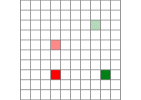

In [3]:
render(m, NamedTuple())

In [4]:
function policy_iterate(policy)
    T = convert(Matrix{Float64}, POMDPModelTools.policy_transition_matrix(m, policy))
    R = POMDPModelTools.policy_reward_vector(m, policy)
    V = inv(I-discount(m)*T)*R
    
    policy_vector = Vector{actiontype(m)}(undef, length(states(m)))
    for s in states(m)
        best_a = nothing
        best_q = -Inf
        for a in actions(m)
            
            # calculate E[V(s') | a]
            trans_dist = transition(m, s, a)
            exp_val = 0.0
            for sp in support(trans_dist)
                exp_val += pdf(trans_dist, sp)*V[stateindex(m, sp)]
            end
            
            q = reward(m, s, a) + discount(m)*exp_val
            
            if q > best_q
                best_q = q
                best_a = a
            end
        end
        policy_vector[stateindex(m, s)] = best_a
    end
    return VectorPolicy(m, policy_vector), V
end

policy_iterate (generic function with 1 method)

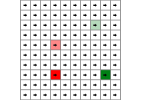

In [5]:
policy = VectorPolicy(m, fill(:right, length(states(m))))
render(m, NamedTuple(), policy=policy)

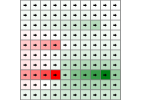

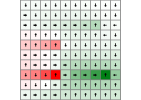

policy.act == newpolicy.act = false


In [6]:
newpolicy, V = policy_iterate(policy)
c = render(m, NamedTuple(), policy=policy, color=s->V[stateindex(m, s)])
display(c)
@show policy.act == newpolicy.act
policy = newpolicy
newc = render(m, NamedTuple(), policy=policy, color=s->V[stateindex(m, s)])
display(newc)

In [7]:
include("bellman.jl")

bellman (generic function with 1 method)

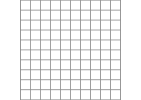

In [8]:
V = zeros(length(states(m)))
render(m, NamedTuple(), color=s->V[stateindex(m, s)])

maximum(abs, Vp - V) = 2.5313178581676254e-5


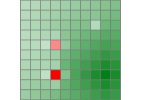

In [67]:
Vp = bellman(m, V)
@show maximum(abs, Vp-V)
V = Vp
render(m, NamedTuple(), color=s->V[stateindex(m, s)])